In [1]:
from Project1_Code import *
import matplotlib.pyplot as plt

# Mathematics for Machine Learning

In [5]:
B = np.array([[3, 2, 5, 1, 0, 2, 4, 3, 1, 0],             [0, 1, 3, 4, 1, 2, 0, 0, 2, 4],             [2, 1, 3, 4, 2, 5, 0, 0, 3, 0],             [0, 4, 2, 3, 7, 0, 2, 5, 2, 1],             [3, 0, 0, 2, 4, 1, 0, 3, 1, 0],             [2, 0, 0, 0, 5, 2, 0, 2, 0, 4],

             [3, 4, 0, 2, 0, 0, 2, 4, 5, 0],             [2, 5, 0, 0, 3, 2, 5, 0, 0, 0],             [3, 1, 3, 4, 0, 0, 0, 0, 3, 2],             [0, 0, 0, 3, 4, 0, 0, 2, 3, 0],             [3, 0, 0, 4, 0, 5, 2, 0, 0, 1],            [2, 2, 0, 3, 0, 4, 0, 0, 2, 3]])


A = np.array([[5, 0, 2, -1] , [2, -1, 5, 0], [1, -2, 0, -5], [0, 5, -1, 2]])
# Get SVD
U, S, Vh = np.linalg.svd(A)

# Get Reduction
A_k = get_low_rank(U, S, Vh, 3)

# Visualize Reduction (it is possible to confirm with matrix_rank)
print(S)


[8. 6. 4. 2.]


fro: [7.48331477e+00 4.47213595e+00 2.00000000e+00 8.48358601e-15]
 
nuc: [1.20000000e+01 6.00000000e+00 2.00000000e+00 1.46606163e-14]
 
inf: [6.00000000e+00 4.00000000e+00 2.00000000e+00 8.43769499e-15]
 
-inf: [6.00000000e+00 4.00000000e+00 2.00000000e+00 5.99520433e-15]
 
1: [6.00000000e+00 4.00000000e+00 2.00000000e+00 8.77076189e-15]
 
-1: [6.00000000e+00 4.00000000e+00 2.00000000e+00 5.66213743e-15]
 
sqrt: [5.60000000e+01 2.00000000e+01 4.00000000e+00 7.19712316e-29]
 


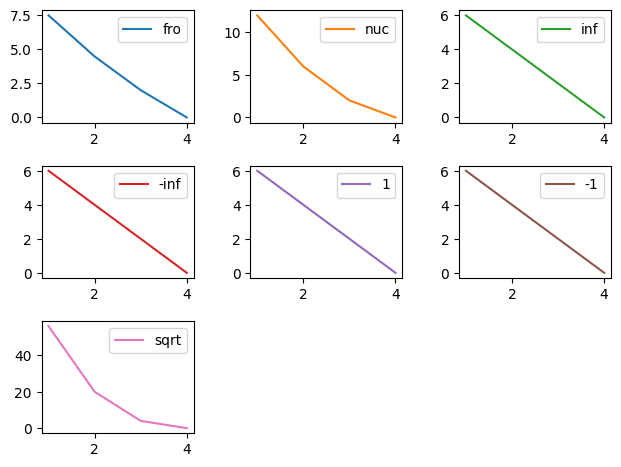

In [3]:
#list of norms
list = ['fro', 'nuc', np.inf, -np.inf, 1 , -1, 'sqrt']
colors = plt.rcParams["axes.prop_cycle"]()

X = range(1, np.size(S) + 1)

figure, axis = plt.subplots(3, 3)
figure.tight_layout(pad = 1.0)

figure.delaxes(axis[2, 2])
figure.delaxes(axis[2, 1])

i = 0
j = 0

# Iterate through norms
for norm in list:
    c = next(colors)["color"]
    axis[i, j].plot(X, get_errors(A, U, S, Vh, norm), label=norm, color=c)
    axis[i, j].legend()
    j = j + 1
    if j % 3 == 0:
        j = 0
        i = i + 1

plt.show()